<a href="https://colab.research.google.com/github/vigneshjayanth00/Football/blob/master/SHAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# example of evaluating a decision tree with random oversampling
from numpy import mean
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyplot
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, confusion_matrix


import matplotlib.pyplot as pyplot

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
#random oversampling to balance the class distribution
oversample = RandomOverSampler(sampling_strategy='minority')

In [0]:
#importing data
data5= pd.read_csv(r'C:\Users\Home\Documents\OptaPro Forum20012020\Updated Data\LB SUMMARY\Final-07-05-2020\Final.csv')
data=data5
#Data manipulation
data['duration']=(data['duration']/25)
data['forward_run_strategy_id']=data['run_strategy_id']-data['hs_run_strategy_id']
data['did_it_break1']=np.where(data['did_it_break']==True,1,0)
del data['did_it_break']
del data['run_strategy_id']
del data['match_id']
data1=data[data['duration']>8]

#Removing the duration field as it may distort the model
data2=data1.iloc[:,4:]

# split into input (X) and output (Y) variables
X = data2.iloc[:,0:6]
Y = data2.iloc[:,6]

In [0]:
# define pipeline
steps = [('over', RandomOverSampler()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=8, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, Y, scoring='f1_micro', cv=cv, n_jobs=-1)
score = mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.525


In [0]:
# Split data into training and test sets
# fit and apply the transform
# define undersampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')

X_train_over, y_train_over = oversample.fit_resample(X, Y)

X_train, X_test, y_train, y_test = train_test_split(X_train_over, y_train_over,
                                                    test_size = 0.35, random_state = 3)

In [0]:
# Step 2: Make an instance of the Model
tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
clf = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=5)
clf.fit(X_train_over, y_train_over)
clf = DecisionTreeClassifier(max_depth=20)

# Step 3: Train the model on the data
clf.fit(X_train, y_train)
# Step 4: Predict labels of unseen (test) data
# Not doing this step in the tutorial
# clf.predict(X_test)

y_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train)

#Accuracy,f1_score,recall_score
recall_score=recall_score(y_test, y_pred)
accuracy_score=accuracy_score(y_test, y_pred)
f1_score=f1_score(y_test, y_pred)

print('F1 Score: %.3f' % f1_score)
print('Accuracy Score: %.3f' % accuracy_score)
print('Recall Score: %.3f' % recall_score)

F1 Score: 0.621
Accuracy Score: 0.615
Recall Score: 0.681


No Skill: ROC AUC=0.500
Decision Tree: ROC AUC=0.627


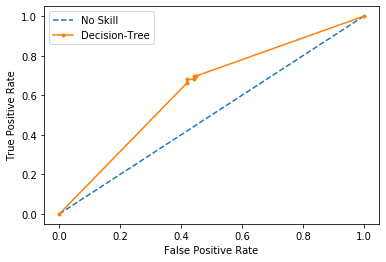

In [0]:
#Print confusion matrix for both test and train sets
cm_test = confusion_matrix(y_test, y_pred)
cm_train = confusion_matrix(y_train, y_train_pred)

# predict probabilities
DT_probs = clf.predict_proba(X_test)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# keep probabilities for the positive outcome only
DT_probs = DT_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
dt_auc = roc_auc_score(y_test, DT_probs)

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, DT_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Decision Tree: ROC AUC=%.3f' % (dt_auc))
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Decision-Tree')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [0]:

from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_pred)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))


Average precision-recall score: 0.54


Setting feature_perturbation = "tree_path_dependent" because no background data was given.


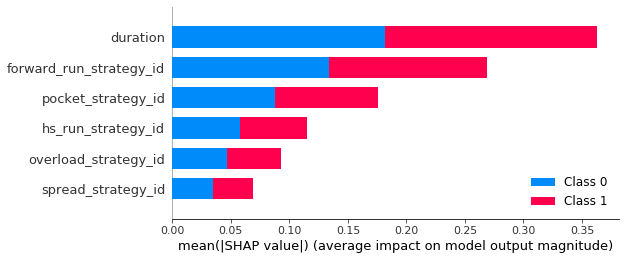

In [0]:
###################################################################################
import shap
shap_values = shap.TreeExplainer(clf).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

In [0]:
shap.initjs()


In [0]:
data_for_prediction = X_test.iloc[0:1,:].values.astype('float')
background = X_train.iloc[0:100,:].values.astype('float')
explainer = shap.TreeExplainer(clf, background)
shap_values = explainer.shap_values(data_for_prediction)
shap.force_plot(explainer.expected_value[0], shap_values[0], data_for_prediction,feature_names=X.columns,link="logit")

In [0]:
data_for_prediction = X_test.iloc[0:1,:].values.astype('float')
background = X_train.iloc[0:100,:].values.astype('float')
explainer = shap.TreeExplainer(clf, background)
shap_values = explainer.shap_values(background)
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test,feature_names=X.columns,link="logit")

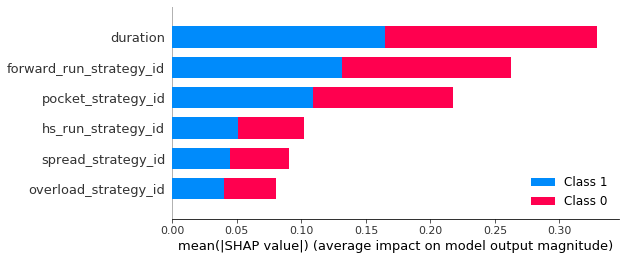

In [0]:
shap.summary_plot(shap_values, X)

In [0]:
# create a dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("duration", shap_values, X)

TypeError: The passed shap_values are a list not an array! If you have a list of explanations try passing shap_values[0] instead to explain the first output class of a multi-output model.

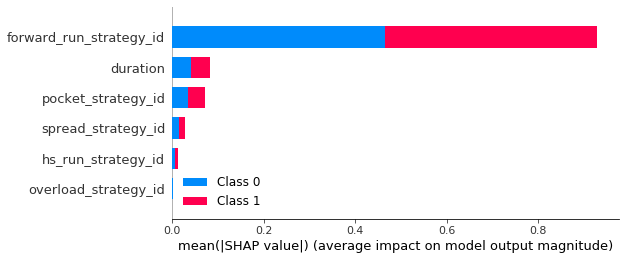

In [0]:
# summarize the effects of all the features
shap.summary_plot(shap_values, X)

In [0]:
shap.dependence_plot(0, shap_values, X)

TypeError: The passed shap_values are a list not an array! If you have a list of explanations try passing shap_values[0] instead to explain the first output class of a multi-output model.